# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import pylab
import matplotlib.pyplot as plt

In [52]:
# %matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [9]:
athletes = pd.read_csv("athletes.csv")

In [10]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [13]:
# Sua análise começa aqui.
# athletes.head() 
# athletes.columns
# athletes.dtypes

id               int64
name            object
nationality     object
sex             object
dob             object
height         float64
weight         float64
sport           object
gold             int64
silver           int64
bronze           int64
dtype: object

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [23]:
height_samp_rand = get_sample(athletes,col_name = 'height',n=3000)
# height_samp_rand
sct.shapiro(height_samp_rand)

5.681722541339695e-07

In [24]:
def q1():
    # Retorne aqui o resultado da questão 1.
    return(bool(sct.shapiro(height_samp_rand)[1]>=0.05))
    pass

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

False


((array([-3.50184707, -3.25811987, -3.12333914, ...,  3.12333914,
          3.25811987,  3.50184707]),
  array([ 37.,  39.,  39., ..., 159., 160., 160.])),
 (15.945260855959944, 72.12266666666666, 0.9733842945053893))

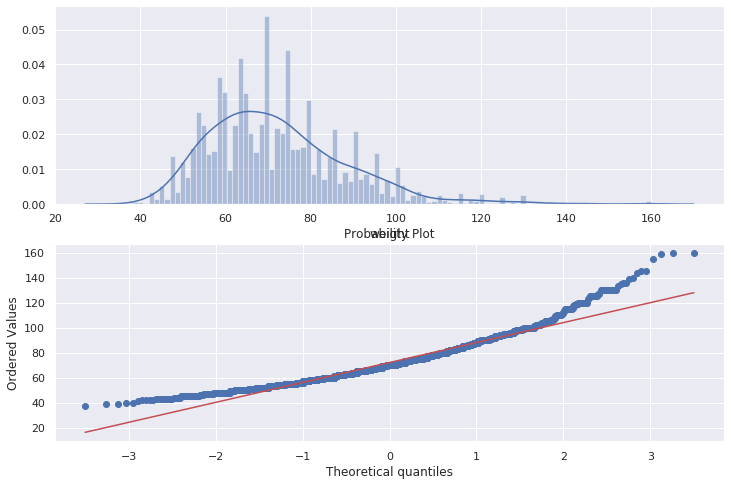

In [54]:
print(q1())
plt.subplot(211)
sns.distplot(height_samp_rand,bins=100)
plt.subplot(212)
sct.probplot(height_samp_rand,dist='norm',plot=pylab)
# De fato, Podemos comprovar visualmente o teste estatístico feito.

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [120]:
# height_samp_rand
sct.jarque_bera(height_samp_rand)[1]


False

In [115]:
def q2():
    # Retorne aqui o resultado da questão 2.
    return bool(sct.jarque_bera(height_samp_rand)[1] >= 0.05)
    pass

In [116]:
q2()

True

__Para refletir__:

* Esse resultado faz sentido?
  Resp : Sim, pois de fato **a altura dos atletas não se distribuem normalmente**, como provamos através do Shapiro-Wilk, QQ-plot e histograma, e agora, através do jarque bera

Obs : O resultado se aproxima da normalidade mas não é segundo o critério de 5%

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [43]:
weight_samp_rand = get_sample(athletes,col_name = 'weight',n=3000)
sct.normaltest(weight_samp_rand)

NormaltestResult(statistic=510.24655809881176, pvalue=1.5898922918029537e-111)

In [44]:
def q3():
    # Retorne aqui o resultado da questão 3.
    return (bool(sct.normaltest(weight_samp_rand)[1]>= 0.05))
    pass

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

False


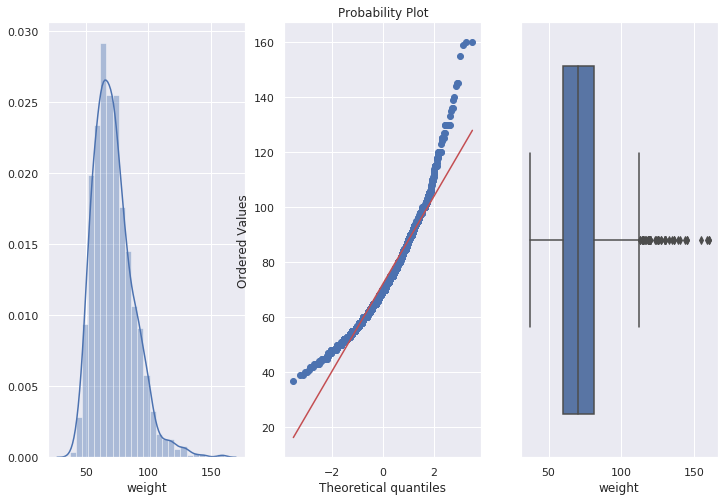

In [55]:
print(q3()) 
plt.subplot(131)
sns.distplot(weight_samp_rand,bins=25)
plt.subplot(132)
sct.probplot(weight_samp_rand,dist='norm',plot=pylab)
plt.subplot(133)
sns.boxplot(weight_samp_rand)


## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [57]:
sample_weight_log = np.log(weight_samp_rand)
sct.normaltest(sample_weight_log)[1]

1.0705572101256944e-10

In [58]:
def q4():
    # Retorne aqui o resultado da questão 4.
    return bool(sct.normaltest(sample_weight_log)[1]> 0.05)
    pass

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

False


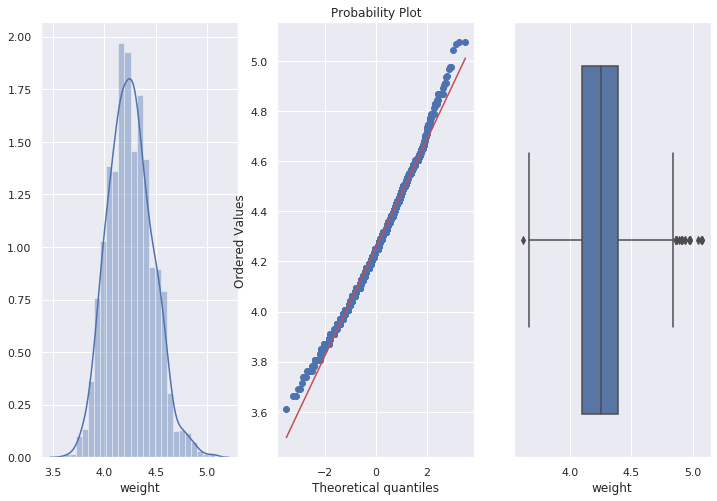

In [60]:
print(q4())

plt.subplot(131)
sns.distplot(sample_weight_log,bins=25)
plt.subplot(132)
sct.probplot(sample_weight_log,dist='norm',plot=pylab)
plt.subplot(133)
sns.boxplot(sample_weight_log)


> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [98]:
Df_Q567 = athletes.query("nationality == 'BRA' | nationality == 'USA' | nationality == 'CAN' ") 

BR_Height = Df_Q567[Df_Q567['nationality'] == 'BRA']["height"]
USA_Height =Df_Q567[Df_Q567['nationality'] == 'USA']["height"]
# print(Df_Q567.head)


resp5 = ttest_stats, ttest_p_valor = sct.ttest_ind(BR_Height, USA_Height, equal_var=False, nan_policy="omit")
print(resp5)


Ttest_indResult(statistic=-3.2232436467501855, pvalue=0.0013080041830140115)


In [86]:
def q5():
    # Retorne aqui o resultado da questão 5.
    return bool(resp5[1] >= 0.05)
    pass

In [87]:
q5()

False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [99]:
BR_Height = Df_Q567[Df_Q567['nationality'] == 'BRA']["height"]
CAN_Height =Df_Q567[Df_Q567['nationality'] == 'CAN']["height"]


resp6 = ttest_stats, ttest_p_valor = sct.ttest_ind(BR_Height, CAN_Height, equal_var=False, nan_policy="omit")
print(resp6[1])


0.5230827295440921


In [95]:
def q6():
    # Retorne aqui o resultado da questão 6.
    return bool(resp6[1] > 0.05)
    pass

In [96]:
q6()

True

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [105]:

USA_Height = Df_Q567[Df_Q567['nationality'] == 'USA']["height"]
CAN_Height =Df_Q567[Df_Q567['nationality'] == 'CAN']["height"]

resp7 = ttest_stats, ttest_p_valor = sct.ttest_ind(USA_Height, CAN_Height, equal_var=False, nan_policy="omit")
resp7 = np.around(resp7,decimals=8)
print(resp7[1])

0.00046601


In [108]:
def q7():
    # Retorne aqui o resultado da questão 7.
    return resp7[1]
    pass 

In [109]:
q7()

0.00046601

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?